### Imbalance Dataset

In [67]:
from sklearn.datasets import make_classification
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns

In [68]:
X,Y = make_classification(n_samples = 1000, n_features=2, n_classes=2,n_clusters_per_class=1, n_redundant=0, weights= [0.99], random_state = 10)

In [69]:
Counter(Y)

Counter({np.int64(0): 985, np.int64(1): 15})

<Axes: xlabel='0', ylabel='1'>

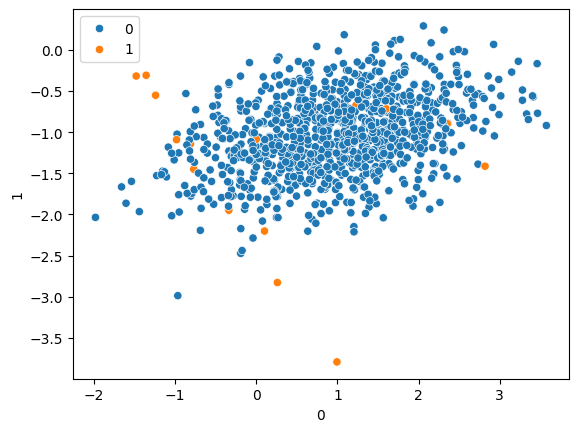

In [70]:
sns.scatterplot(data = pd.DataFrame(X),x = 0,y = 1, hue=Y)

In [71]:
from sklearn .model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1,0.1,0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

class_weights = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weights)

In [73]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv = cv, n_jobs=-1)

In [75]:
grid

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [76]:
grid.fit(X_train,Y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packag

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [77]:
y_pred = grid.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
score=accuracy_score(Y_test,y_pred)
print(score)
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

0.9833333333333333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       295
           1       0.00      0.00      0.00         5

    accuracy                           0.98       300
   macro avg       0.49      0.50      0.50       300
weighted avg       0.97      0.98      0.98       300

[[295   0]
 [  5   0]]


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [79]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 1, 1: 10},
 'penalty': 'l2',
 'solver': 'liblinear'}

In [80]:
grid.best_score_

np.float64(0.9885714285714287)